In [2887]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/steam.csv')

In [2888]:
print(df.shape)
df.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [2889]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [2890]:
# Convert owners range
def owners_to_num(x):
    low, high = x.split("-")
    return (int(low) + int(high)) / 2

df["owners_num"] = df["owners"].apply(owners_to_num)

In [2891]:
top10_playtime = df.nlargest(10, "average_playtime")[["name", "average_playtime"]]
top10_playtime

,name,average_playtime
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204
3969,Shroud of the Avatar: Forsaken Virtues,54618
2435,X-Plane 11,44169
23409,懒人修仙传,43632
2023,Fantasy Grounds,43074
8919,Screeps,38805


In [2892]:
# drop the outlier game
df = df.drop(df["average_playtime"].idxmax())

<Axes: xlabel='average_playtime', ylabel='Count'>

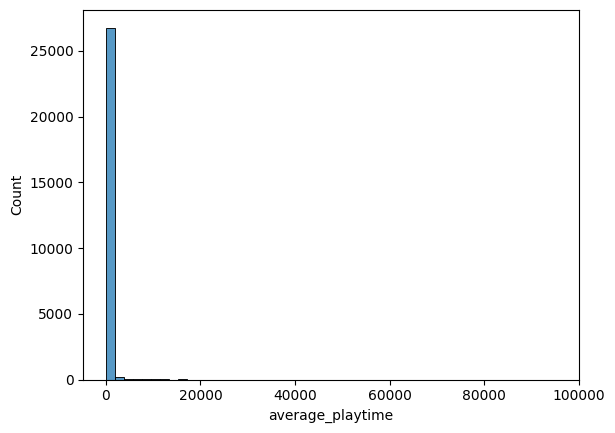

In [2893]:
sns.histplot(df["average_playtime"], bins=50)

<Axes: xlabel='average_playtime', ylabel='Count'>

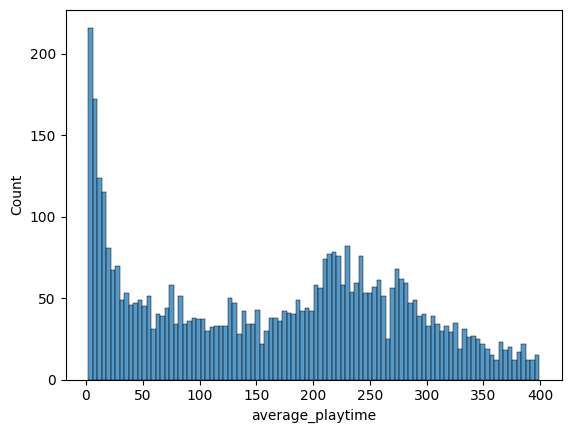

In [2894]:
df_filter =  df[(df["average_playtime"] < 400) & (df["average_playtime"] > 1)]
sns.histplot((df_filter["average_playtime"]), bins=100)

<Axes: xlabel='average_playtime', ylabel='Count'>

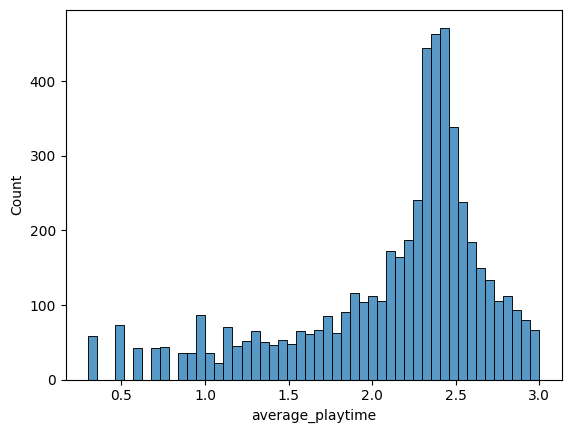

In [2895]:
df_filter =  df[(df["average_playtime"] < 1000) & (df["average_playtime"] > 1)]
sns.histplot(np.log10(df_filter["average_playtime"]), bins=50)


<Axes: xlabel='average_playtime', ylabel='Count'>

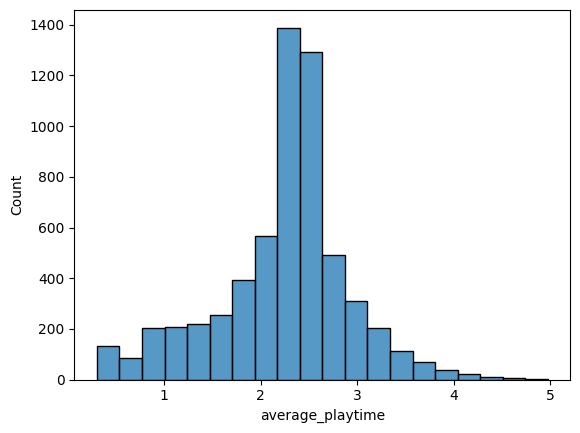

In [2896]:
df_filter =  df[df["average_playtime"] > 1]
sns.histplot(np.log10(df_filter["average_playtime"]), bins=20)


/home/shatha/.pyenv/versions/Game_Addictiveness/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='average_playtime', ylabel='Count'>

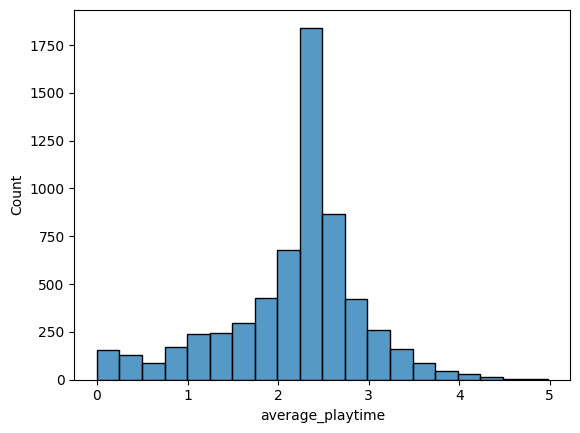

In [2897]:
df_filter =  df
sns.histplot(np.log10(df_filter["average_playtime"]), bins=20)

In [2898]:
df[(df["average_playtime"] < 1000) & (df["average_playtime"] > 1)]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,owners_num
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,7500000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,7500000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,7500000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,7500000.0
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99,7500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26468,1020340,Audica,2019-03-07,1,"Harmonix Music Systems, Inc","Harmonix Music Systems, Inc",windows,0,Single-player,Action;Indie;Early Access,Early Access;Rhythm;Music,0,132,34,17,17,0-20000,15.49,10000.0
26481,1020820,KumaKuma Manga Editor,2019-02-27,1,KumaKumaManga,SakuraGame,windows,0,Steam Achievements,Animation & Modeling;Design & Illustration;Web...,Design & Illustration;Web Publishing;Animation...,14,346,41,43,43,20000-50000,4.79,35000.0
26681,1031480,東方幕華祭 春雪篇 ～ Fantastic Danmaku Festival Part II,2019-03-18,1,东方幕华祭制作组,东方幕华祭制作组,windows,0,Single-player;Steam Achievements;Partial Contr...,Indie,Indie;Bullet Hell;Faith,27,619,19,154,154,0-20000,10.29,10000.0
26856,1043180,Lovers of Aether,2019-04-01,1,Dan Fornace,Dan Fornace,windows;mac,0,Single-player;Steam Cloud,Casual;Indie;Simulation,Psychological Horror;Dating Sim;Casual,15,651,29,12,12,50000-100000,0.00,75000.0


In [2899]:
# Column for free games
# df['is_free'] = df['price'].apply(lambda x: 1 if x==0 else 0)

In [2900]:
# Convert release_date to datetime
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_date"].head()

0   2000-11-01
1   1999-04-01
2   2003-05-01
3   2001-06-01
4   1999-11-01
Name: release_date, dtype: datetime64[ns]

In [2901]:
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

In [2902]:
# days_since_release already created above

df = df.drop(columns=["appid", "name", "owners", "release_date", "publisher", "developer", "platforms", "english","required_age","steamspy_tags"])

In [2903]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

print("Numeric columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())

Numeric columns: ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 'owners_num', 'total_ratings']
Categorical columns: ['categories', 'genres']


In [2904]:
# Normalize numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].describe()

,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners_num,total_ratings
count,2.707400e+04,2.707400e+04,2.707400e+04,2.707400e+04,2.707400e+04,2.707400e+04,2.707400e+04,2.707400e+04
mean,4.199115e-18,2.099557e-18,1.049779e-18,-1.049779e-17,2.729425e-17,-2.519469e-17,-1.259734e-17,-1.049779e-18
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-1.283084e-01,-5.269391e-02,-4.925021e-02,-1.010049e-01,-6.783032e-02,-7.718787e-01,-9.343705e-02,-5.397562e-02
25%,-1.283084e-01,-5.237793e-02,-4.878346e-02,-1.010049e-01,-6.783032e-02,-5.572710e-01,-9.343705e-02,-5.357435e-02
50%,-1.084598e-01,-5.143000e-02,-4.714983e-02,-1.010049e-01,-6.783032e-02,-2.652014e-01,-9.343705e-02,-5.241515e-02
75%,-6.309163e-02,-4.605839e-02,-3.944844e-02,-1.010049e-01,-6.783032e-02,1.411563e-01,-7.461300e-02,-4.617325e-02
max,2.771924e+01,1.392091e+02,1.136224e+02,6.728178e+01,9.287477e+01,5.281527e+01,1.128433e+02,1.357837e+02


In [2905]:
# encoding categorical data

df[cat_cols] = df[cat_cols].fillna("unknown")

# Take only first tag
for col in cat_cols:
    df[col] = df[col].apply(lambda x: x.split(";")[0] if ";" in x else x)

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))


In [2906]:
encoded_df.shape

(27074, 49)

In [2907]:
# Merge numerical and encoded categorical data
df_preprocessed = pd.concat([df[num_cols], encoded_df], axis=1).dropna()

In [2908]:
X = df_preprocessed[["average_playtime", "owners_num", "price", "total_ratings"]]

X.head()

,average_playtime,owners_num,price,total_ratings
0,12.358921,11.193461,0.141156,5.647191
1,0.094964,5.546247,-0.265201,0.122135
2,0.031292,5.546247,-0.265201,0.116027
3,0.081522,5.546247,-0.265201,0.014641
4,0.340455,5.546247,-0.265201,0.192891


In [2909]:
X.describe()

,average_playtime,owners_num,price,total_ratings
count,27073.000000,27073.000000,27073.000000,27073.000000
mean,0.000004,0.000003,0.000004,0.000002
std,1.000037,1.000037,1.000037,1.000037
min,-0.101005,-0.093437,-0.771879,-0.053976
25%,-0.101005,-0.093437,-0.557271,-0.053574
50%,-0.101005,-0.093437,-0.265201,-0.052415
75%,-0.101005,-0.074613,0.141156,-0.046173
max,67.281783,112.843311,52.815272,135.783702


In [2910]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_preprocessed["cluster"] = kmeans.fit_predict(X)


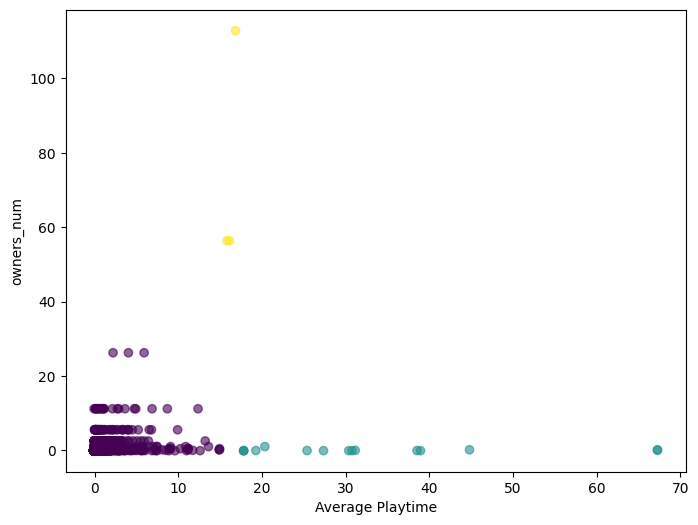

In [2911]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(df_preprocessed["average_playtime"], df_preprocessed["owners_num"],
            c=df_preprocessed["cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Average Playtime")
plt.ylabel("owners_num")
plt.show()

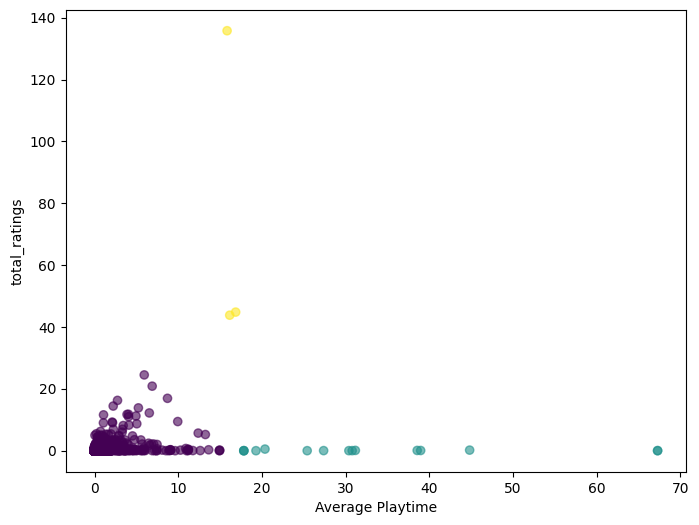

In [2912]:
plt.figure(figsize=(8,6))
plt.scatter(df_preprocessed["average_playtime"], df_preprocessed["total_ratings"],
            c=df_preprocessed["cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Average Playtime")
plt.ylabel("total_ratings")
plt.show()

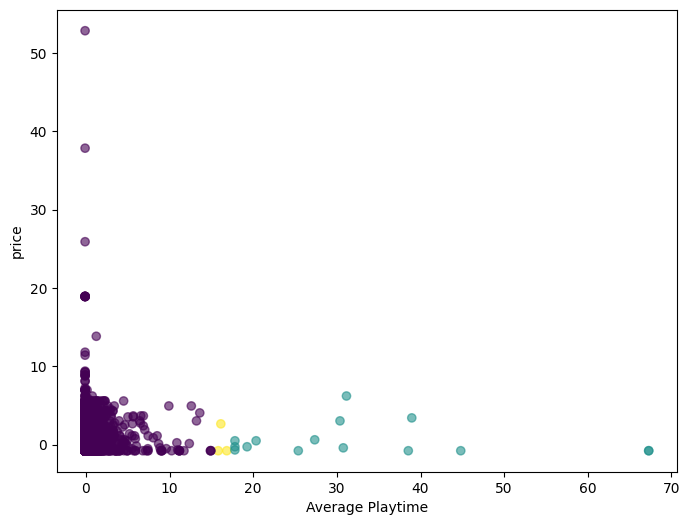

In [2913]:
plt.figure(figsize=(8,6))
plt.scatter(df_preprocessed["average_playtime"], df_preprocessed["price"],
            c=df_preprocessed["cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Average Playtime")
plt.ylabel("price")
plt.show()